In [24]:
%matplotlib inline
import os
import os.path as op
import mne
import numpy as np
import pandas as pd

In [25]:
eo_fname = 'D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\original_preprocessed_data\\sub-010002\\sub-010002_EO.fif'
ec_fname = 'D:\\FY2025\\Fukuyama\\work place\\eeg-mri-aging-analysis\\data\\original_preprocessed_data\\sub-010002\\sub-010002_EC.fif'

# Load the saved FIF files
raw_eo= mne.io.read_raw_fif(eo_fname, preload=True)
raw_ec = mne.io.read_raw_fif(ec_fname, preload=True)

Opening raw data file D:\FY2025\Fukuyama\work place\eeg-mri-aging-analysis\data\original_preprocessed_data\sub-010002\sub-010002_EO.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Range : 171871 ... 1331887 =     68.748 ...   532.755 secs
Ready.
Reading 0 ... 1160016  =      0.000 ...   464.006 secs...


C:\Users\sFukuyama\AppData\Local\Temp\3\ipykernel_32504\516806188.py:5: RuntimeWarning: This filename (D:\FY2025\Fukuyama\work place\eeg-mri-aging-analysis\data\original_preprocessed_data\sub-010002\sub-010002_EO.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_eo= mne.io.read_raw_fif(eo_fname, preload=True)


Opening raw data file D:\FY2025\Fukuyama\work place\eeg-mri-aging-analysis\data\original_preprocessed_data\sub-010002\sub-010002_EC.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 61) active
    Range : 15962 ... 1175978 =      6.385 ...   470.391 secs
Ready.
Reading 0 ... 1160016  =      0.000 ...   464.006 secs...


C:\Users\sFukuyama\AppData\Local\Temp\3\ipykernel_32504\516806188.py:6: RuntimeWarning: This filename (D:\FY2025\Fukuyama\work place\eeg-mri-aging-analysis\data\original_preprocessed_data\sub-010002\sub-010002_EC.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_ec = mne.io.read_raw_fif(ec_fname, preload=True)


In [26]:
raw_eo_csd = mne.preprocessing.compute_current_source_density(raw_eo)

Fitted sphere radius:         95.8 mm
Origin head coordinates:      -0.8 14.2 43.8 mm
Origin device coordinates:    -0.8 14.2 43.8 mm


In [ ]:
raw_eo.plot()


In [ ]:
raw_eo_csd.plot()

In [27]:
epoch_duration=2.0
# -----------------------------
# 2. Create Events and Epochs
# -----------------------------

# 2. Create fixed-length pseudo events every 2 seconds
events = mne.make_fixed_length_events(raw_eo_csd, id=1, duration=epoch_duration)

# 3. Epoching
epochs = mne.Epochs(raw_eo_csd, events, event_id=1, tmin=0, tmax=epoch_duration,
                    baseline=None, preload=True)


Not setting metadata
232 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 232 events and 5001 original time points ...
231 bad epochs dropped


In [34]:
epoch_spectrum = epochs.compute_psd(fmin=2.0, fmax=40.0)

    Using multitaper spectrum estimation with 7 DPSS windows


Plotting power spectral density (dB=True).


d:\FY2025\Fukuyama\Programs\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


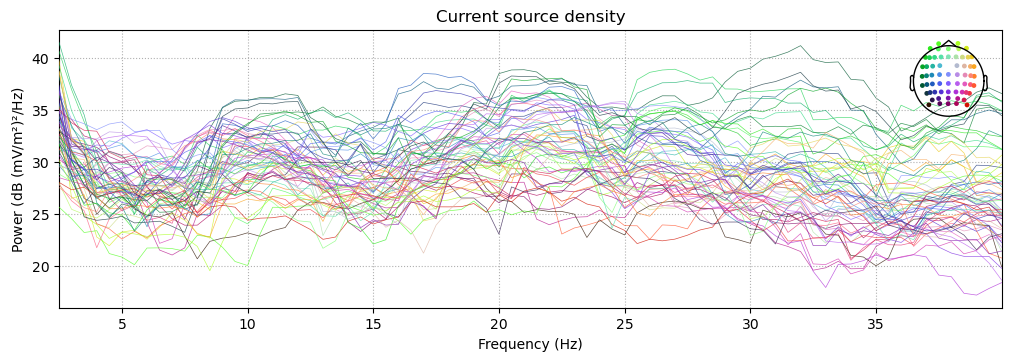

In [36]:
_ = epoch_spectrum.plot()

Plotting power spectral density (dB=True).


d:\FY2025\Fukuyama\Programs\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


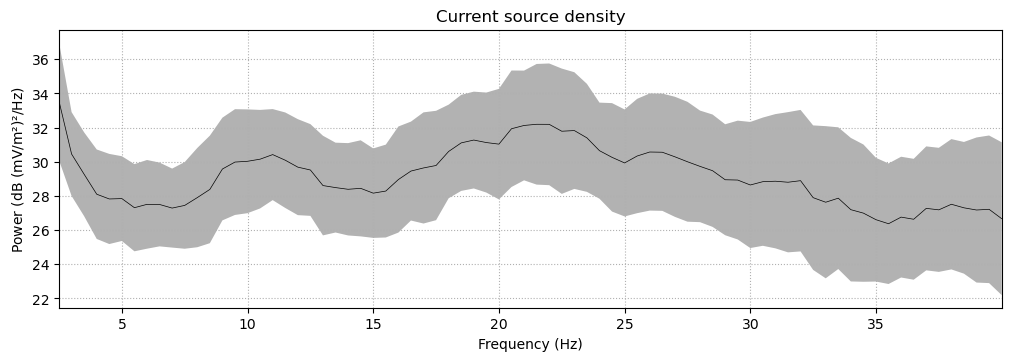

In [37]:
_ = epoch_spectrum.plot(average=True, amplitude=False, picks="data", exclude="bads")

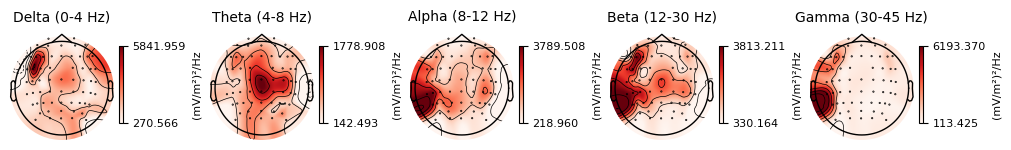

In [38]:
_ = epoch_spectrum.plot_topomap()

In [ ]:
# -----------------------------
# 3. Define frequencies and cycles
# -----------------------------
freqs = np.arange(7, 30, 1)  # 7–30 Hz
n_cycles = freqs / 2.  # 各周波数に対するサイクル数（例: 2周期）

# -----------------------------
# 4. Compute Time-Frequency Power (Morlet)
# -----------------------------
power = mne.time_frequency.tfr_morlet(
    epochs, freqs=freqs, n_cycles=n_cycles,
    use_fft=True, return_itc=False,
    decim=3, n_jobs=1, average=True
)

# -----------------------------
# 5. Visualize Time-Frequency Power
# -----------------------------
power.plot_topo(baseline=None, mode='logratio', title='Average power')
power.plot([0], baseline=None, mode='logratio', title=epochs.ch_names[0])
power.plot_joint(baseline=None, mode='logratio', title='TFR joint view')

In [43]:
csv_file_path = "D:\FY2025\Fukuyama\work place\eeg-mri-aging-analysis\data\Participants_MPILMBB_LEMON.csv"


metadata = pd.read_csv(csv_file_path)


def age_group(age_range):
    if age_range in ["20-25", "25-30", "30-35"]:
        return "young"
    elif age_range in ["60-65", "65-70", "70-75"]:
        return "elderly"
    else:
        return "other"

metadata["group"] = metadata["Age"].map(age_group)

print(type(metadata))
#epochs.metadata = metadata

print(metadata.head())

<class 'pandas.core.frame.DataFrame'>
           ID  Gender_ 1=female_2=male    Age    group
0  sub-010002                        1  65-70  elderly
1  sub-010003                        1  20-25    young
2  sub-010004                        1  65-70  elderly
3  sub-010005                        2  25-30    young
4  sub-010006                        1  65-70  elderly


<>:1: SyntaxWarning: invalid escape sequence '\F'
<>:1: SyntaxWarning: invalid escape sequence '\F'
C:\Users\sFukuyama\AppData\Local\Temp\3\ipykernel_32504\1574061121.py:1: SyntaxWarning: invalid escape sequence '\F'
  csv_file_path = "D:\FY2025\Fukuyama\work place\eeg-mri-aging-analysis\data\Participants_MPILMBB_LEMON.csv"
